<font size="6">Data Visualization</font>

From the Our World in Data Website, we are able to download a csv file of COVID-19 cases Worldwide. One advantage of this dataset is that it updated daily so we can reload it each day to keep track of the latest data. The full dataset is available at 
https://ourworldindata.org/coronavirus-source-data. The data can be divided into two categories: 1. geographically by country 2.data type by confirmed cases and deaths.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [8]:
#Download the dataset 
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


<font size="3">Since we are particularly interested in the COVID-19 data concerning the US, we have created a separate dataframe for the US's statistics. The columns we are interested in is the date and new cases.</font>

In [9]:
Country = 'United States'
US = df[df['location']==Country]
#series = {'Date':US.date,'Total_Cases':US.total_cases,'New_Cases':US.new_cases}
series = {'Date':US.date,'New_Cases':US.new_cases}
data = pd.DataFrame(series).dropna()
data

,Date,New_Cases
126473,2020-01-23,0.0
126474,2020-01-24,1.0
126475,2020-01-25,0.0
126476,2020-01-26,3.0
126477,2020-01-27,0.0
...,...,...
127133,2021-11-13,47499.0
127134,2021-11-14,24810.0
127135,2021-11-15,142099.0
127136,2021-11-16,87481.0


<font size="5">Data Preprocessing</font>

<font size="4"> In this section of data preprocessing, we used the columns of new cases as the dependent variable(y) and the number of days in the first column as the independent variable, aka the predictor, X. </font>

In [10]:
data

,Date,New_Cases
126473,2020-01-23,0.0
126474,2020-01-24,1.0
126475,2020-01-25,0.0
126476,2020-01-26,3.0
126477,2020-01-27,0.0
...,...,...
127133,2021-11-13,47499.0
127134,2021-11-14,24810.0
127135,2021-11-15,142099.0
127136,2021-11-16,87481.0


<font size="4">We used matplotlib to show the graph of new cases in time series. The graph suggests there are three surges(waves) of COVID-19 new cases in the US, which corresponeds to three separate lockdowns.

Also, in order to use time as the index in the x-axis, we time stamp the date and replace the index with the new index date</font>

Text(0, 0.5, 'New Cases')

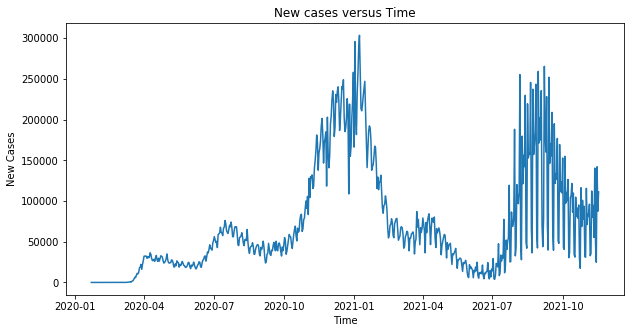

In [11]:
timeData = data.copy()
timeData.Date = pd.to_datetime(timeData.Date)
timeData = timeData.set_index('Date')
sc1 = StandardScaler()
sc2 = StandardScaler()
plt.figure(figsize=(10,5))
plt.plot(timeData.New_Cases)
plt.title('New cases versus Time')
plt.xlabel("Time")
plt.ylabel("New Cases")

<font size="4">Our graph has shown that three have been three surges of COVID-19 new cases in the US, which is also confirmed by the Forbes news. The courtesy of the Forbes is available at https://www.forbes.com/sites/johndrake/2020/12/07/the-real-cause-of-americas-third-wave-of-covid-19/?sh=598fe57f12fd
    
Here we want to take a closer look at these three stages and analyze each of them by using machine learning algorithm such as polynomial regression using time as the predictor and the support vector machine. And in the end, we'll try to use the algorithm to predict the future trend in three months(100 days).</font>

In [14]:
# The first wave stage
first = data[data['Date'].between('2020-02-29', '2020-05-31', inclusive=True)]
# The second wave stage
second = data[data['Date'].between('2020-06-01', '2020-09-03', inclusive=True)]
# The third wave stage
third = data[data['Date'].between('2020-09-04', '2021-02-15', inclusive=True)]
# The fouth stage, which is the post-third wave stage
postThird = data[data['Date'].between('2021-02-20', '2021-06-02', inclusive=True)]
# Current Stage
current = data[data['Date'].between('2021-08-15','2021-11-15',inclusive = True)]

vec = []
for i in range(93):
    vec.append(i+1)
first.loc[:,'Days'] = vec

vec = []
for i in range(95):
    vec.append(i+1)
second.loc[:,'Days'] = vec

vec = []
for i in range(165):
    vec.append(i+1)
third.loc[:,'Days'] = vec

vec = []
for i in range(103):
    vec.append(i+1)
postThird.loc[:,'Days'] = vec

vec = []
for i in range(len(current)):
    vec.append(i+1)
current.loc[:,'Days'] = vec


<font size="5">Model: Polynomial Regression</font>
    
In this section we use the polynomial regression to fit the current and predict the future trend of new cases each day.

<font size="4">Model selection: We compare polynomial regression models of different degrees (0 to 10) using number of days as the predictor. We use 10-fold cross-validation to compare polynomial regression models  and select the K-degree that provides the lowest test set error.</font>


In [15]:
class polymodel:

    def __init__(self, name, degree):
        self.Name = name
        self.Degree = degree
        self.Model = None

    def modelfit(self, a, b):
        features = PolynomialFeatures(degree=self.Degree)
        aply = features.fit_transform(a)
        self.Model = LinearRegression()
        self.Model.fit(aply, b)

    def prediction(self, a):
        features = PolynomialFeatures(degree=self.Degree)
        apoly = features.fit_transform(a)
        rd = np.round(self.Model.predict(apoly), 0)
        rd = rd.astype(np.int32)
        return rd

In [23]:
vec = []
kf = KFold(n_splits=10,shuffle = True)
for i in range(10):
    MSE = []     
    
    for tr, te in kf.split(current):
        test = current.iloc[te, : ]
        train = current.iloc[tr, : ]
        x_train = np.array(train["Days"]).reshape(-1, 1)
        y_train = np.array(train["New_Cases"]).reshape(-1,1)
        rmodel = polymodel("Fitting new Cases with Polynomial Regression Degree =(%i)"%i, i)
        rmodel.modelfit(x_train, y_train)
        X = np.array(test["Days"]).reshape(-1, 1)
        Y = np.array(test["New_Cases"]).reshape(-1,1)
        Y_pred = rmodel.prediction(X)
        mse = mean_squared_error(Y,Y_pred)
        MSE.append(mse)
    
    miu = np.mean(MSE)   
    vec.append({'Degrees':i,'MSEV':miu})

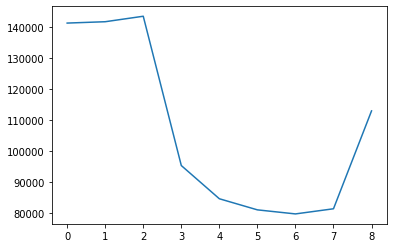

In [24]:
plt.plot(range(len(X)),Y_pred)

Text(0, 0.5, 'MSE')

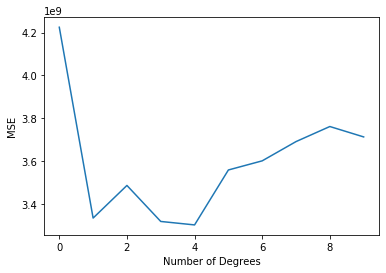

In [25]:
vec = pd.DataFrame(vec)
plt.plot(vec.Degrees,vec.MSEV)
plt.xlabel("Number of Degrees")
plt.ylabel("MSE")

In [26]:
deg = vec.loc[vec.MSEV.argmin(),:].Degrees.astype(np.int64)
x = np.array(current["Days"]).reshape([-1,1])
y = np.array(current["New_Cases"]).reshape([-1,1])
#Fit the polynomial model
pm = polymodel("Polynomial Regression", deg)
pm.modelfit(x, y)
# Using the polynomial model to predict the new cases 
pred = pm.prediction(x)

Text(0, 0.5, 'Number of New Cases')

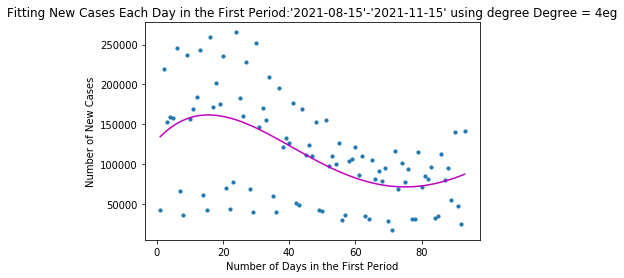

In [27]:
plt.scatter(x, y, s=10)
plt.plot(x, pred, color='m')
plt.title("Fitting New Cases Each Day in the current Period:'2021-08-15'-'2021-11-15' using degree Degree = %deg"%deg)
plt.xlabel("Number of Days in the Current Period")
plt.ylabel("Number of New Cases")

As suggested by the figure, the similarity between the actual values and the fitted curves look pretty ideal, we managed to predict the new cases of this period as a polynomial regression model of degree 4.

Model estimation:
                               
                               Y = 1+t+t^2+t^3+t^4+t^5 
                               
Y is the number of new cases each day and t is the number of days.

<font size="5">Prediction using Polynomial Regression<font>

By using the polynomial of degree 5, which is the best model among all polynomial models, we can predict the future value by using the model estimation

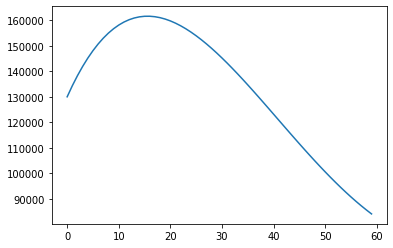

In [30]:
arr = np.array(range(0, 60)).reshape(-1, 1)
pred = pm.prediction(arr)
plt.plot(pred)

<font size="3">The graph suggests that, in the next two months, there could be decreasing trend of COVID-19 in the US.</font>

<font size="5">Model: Support Vector Machine<font>

In this section we use the Support Vector Machine to fit the current and predict the future trend of new cases each day.

<font size="3">Model selection: We compare SVM model to fit the current trend and predict the future trend using number of days as the predictor. We use 10-fold cross-validation to compare polynomial regression models and SVm to select the best model that provides the lowest test set error.</font>

In [37]:
X_original = np.arange(len(current))

y_original = current.iloc[:,1].values.astype(float)

kf = KFold(n_splits=10,shuffle = True)
MSE = []     
dft = 'rbf'
for tr, te in kf.split(current):
    test = current.iloc[te, : ]
    train = current.iloc[tr, : ]
    x = np.array(train["Days"]).reshape(-1, 1)
    y = np.array(train["New_Cases"]).reshape(-1,1)
    x = sc1.fit_transform(x)
    y = sc2.fit_transform(y)       

    #Fit the SVM model
    svm = SVR(kernel=dft)
    svm.fit(x,y)
    
    X = np.array(test["Days"]).reshape(-1, 1)
    Y = np.array(test["New_Cases"]).reshape(-1,1)
    X = sc1.transform(X)
    Y = sc2.transform(Y)
    pred = svm.predict(X)
    mse = mean_squared_error(Y,pred)
    MSE.append(mse)

C:\Users\16348\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16348\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16348\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16348\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [38]:
np.mean(MSE)

0.7846592995500518

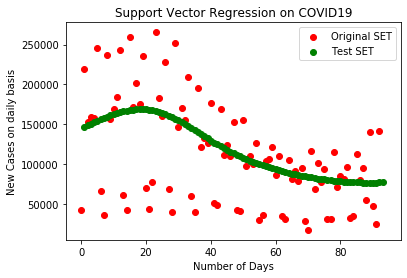

In [49]:
#plot the regression fit with original data
X = np.array(current["Days"]).reshape(-1, 1)
X = sc1.transform(X)
pred = svm.predict(X)
pred = sc2.inverse_transform(pred)
pred = np.array(pred)
pred = pred.reshape(-1,1)
test = sc1.inverse_transform(X)
test = np.array(test)

plt.scatter(X_original, y_original, color = 'r', label = 'Original SET')
plt.scatter(test, pred, color = 'g', label = 'Test SET')
plt.title('Support Vector Regression on COVID19')
plt.xlabel('Number of Days')
plt.ylabel('New Cases on daily basis')
plt.legend()
plt.show()

As suggested by the figure, the similarity between the actual values and the fitted curves look pretty ideal, we managed to predict the new cases of third period as a SVM model.

<font size="3">Prediction USING SVM<font>

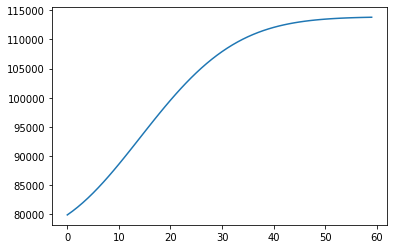

In [48]:
#predict the future COVID new cases by putting in number of days from now on
vec = []
for i in range(60):
    i = i+100
    tran = sc1.transform([[i]])
    pred = svm.predict(tran)
    pred = sc2.inverse_transform(pred)
    vec.append(pred)

plt.plot(vec)

<font size="4">By using the SVM model we fit, we get the same conclusion as before (using polynomial regression) that the number of cases in the future 30 days will increase almost in quadratic growth and therefore there could potentially be another wave of COVID-19 in the US.</font>